In [1]:
import os; os.chdir("..")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from urbanstats.geometry.shapefiles.shapefiles_list import shapefiles
from urbanstats.data.gpw import load_full_ghs_zarr
from urbanstats.geometry.rasterize import rasterize_using_lines

/home/kavi/anaconda3/envs/urbanstats-310/lib/python3.10/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [4]:
global_map = {1200: load_full_ghs_zarr(1200), 120: load_full_ghs_zarr(120)}

In [5]:
def plot_lines(shape, resolution, pad=10, alpha=0.25):
    xs, ystarts,yends = rasterize_using_lines(shape, resolution)
    left = ystarts.min()-pad
    top = xs.max() + pad
    bot = xs.min() - pad
    plt.figure(dpi=200)
    arr = global_map[resolution][xs.min()-pad:top+pad, left:yends.max() + pad]
    plt.imshow(arr, interpolation="none", clim=(0, np.percentile(arr, 90)))
    stride = 1#max(1, min(3, len(xs) // 100))
    for x, ystart, yend in zip(xs[::stride], ystarts[::stride], yends[::stride]):
        plt.fill_between([ystart - left, yend - left + 1], [x - bot, x - bot], [x - bot + 1, x - bot + 1], color="magenta", alpha=alpha)
    # return xs

In [6]:
countries = shapefiles["countries"].load_file()
counties = shapefiles["counties"].load_file()
subn = shapefiles["subnational_regions"].load_file()
urbc = shapefiles["urban_centers"].load_file()

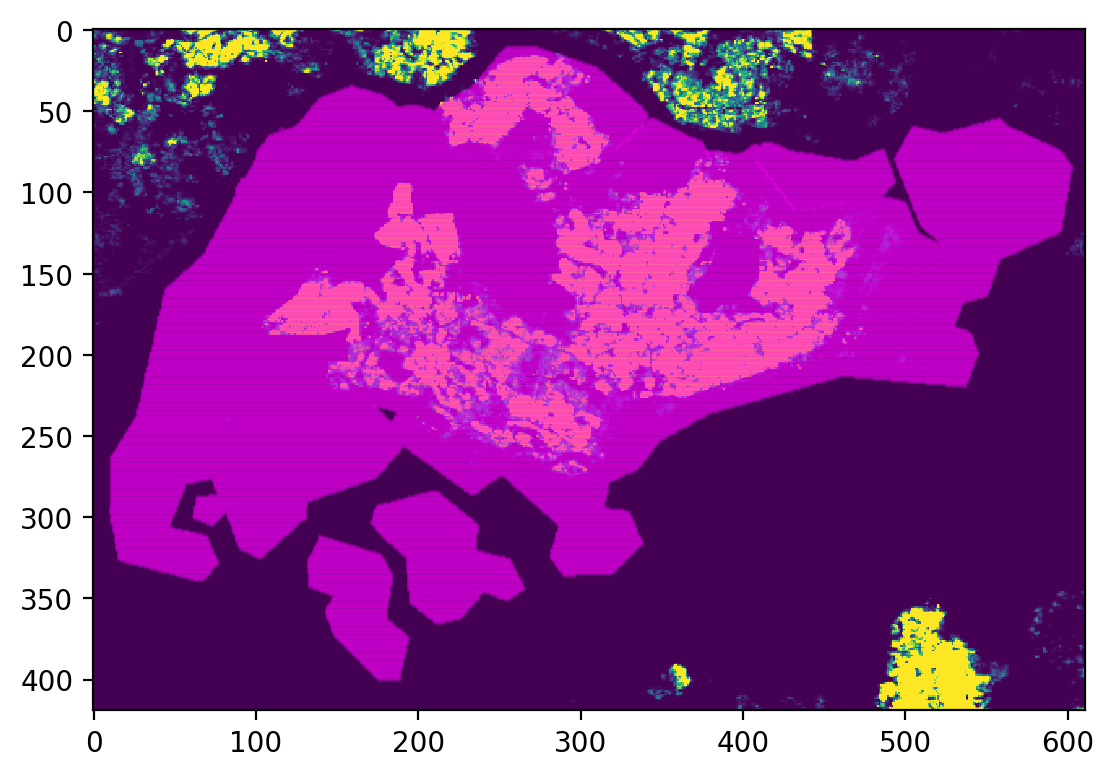

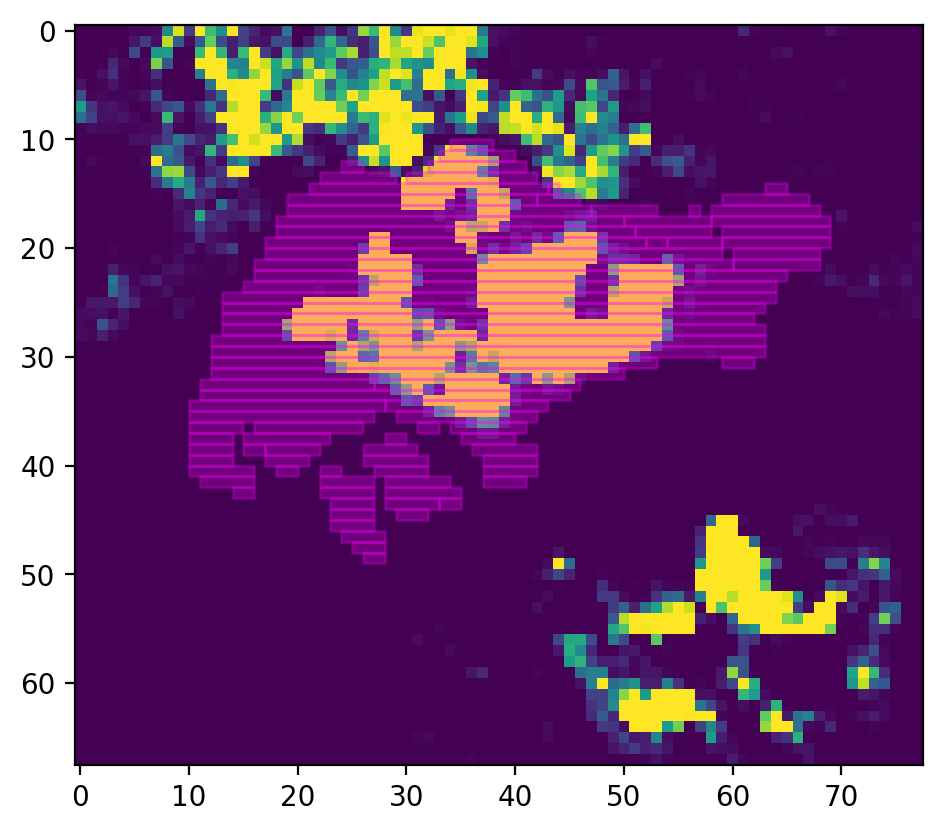

In [7]:
shape = countries[countries.longname == "Singapore"].iloc[0].geometry
plot_lines(shape, 1200)
plot_lines(shape, 120)

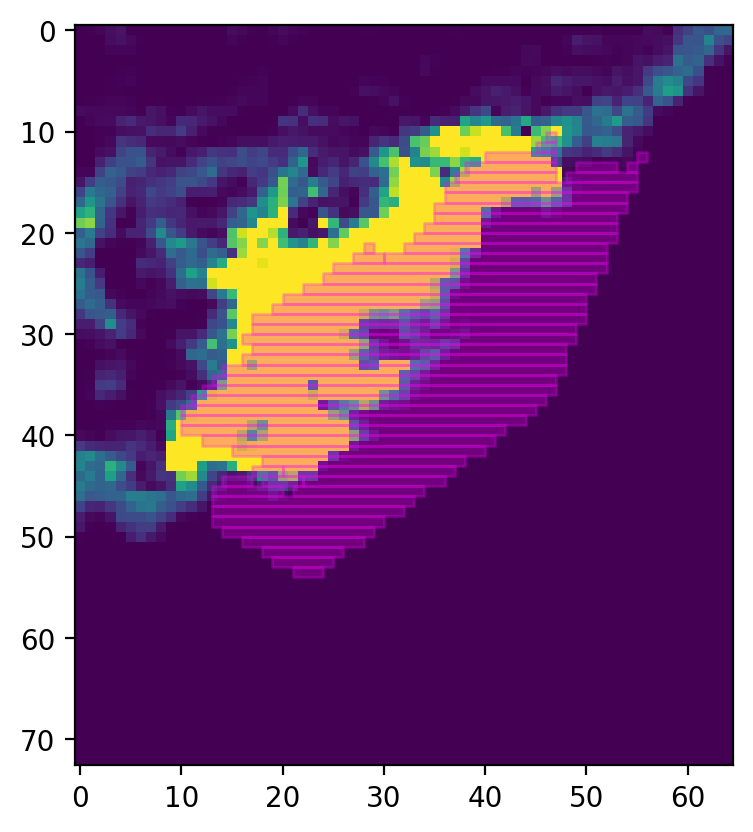

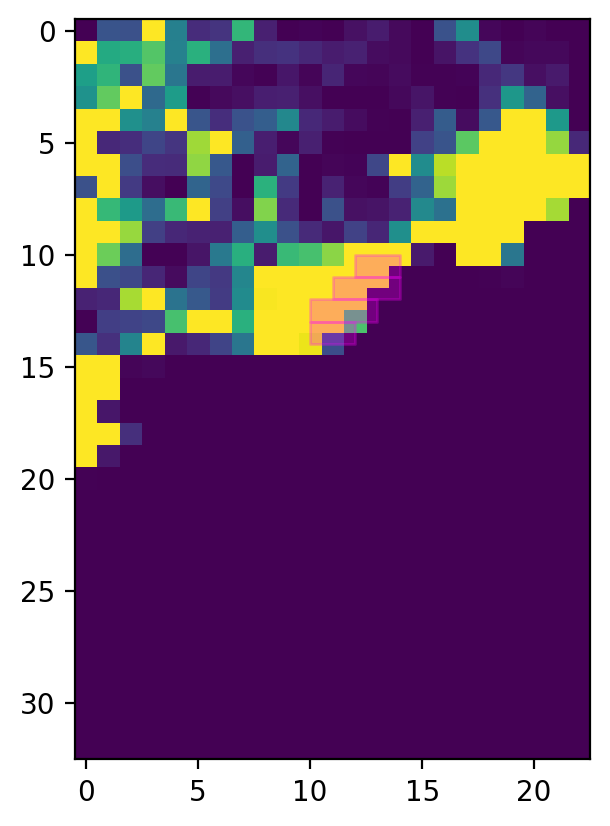

In [8]:
shape = countries[countries.longname == "Monaco"].iloc[0].geometry
plot_lines(shape, 1200)
plot_lines(shape, 120)

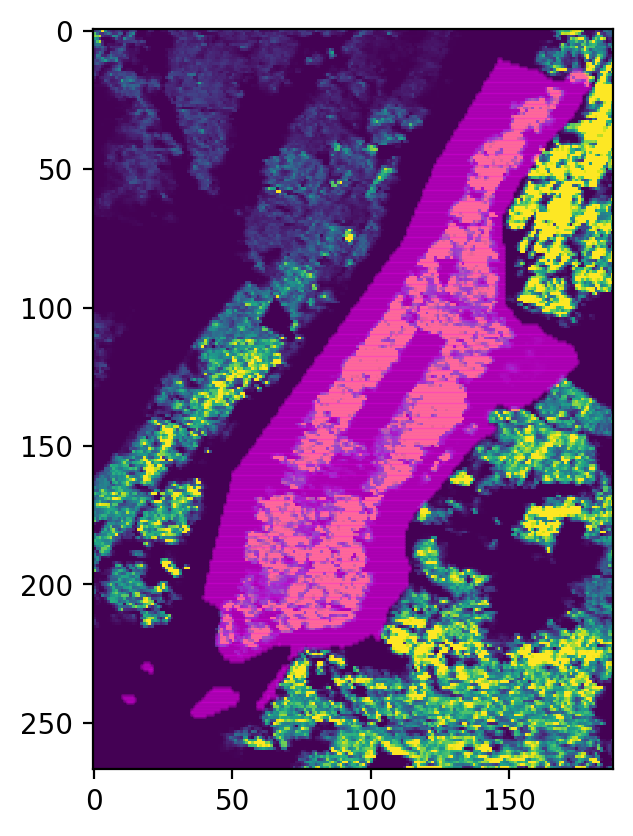

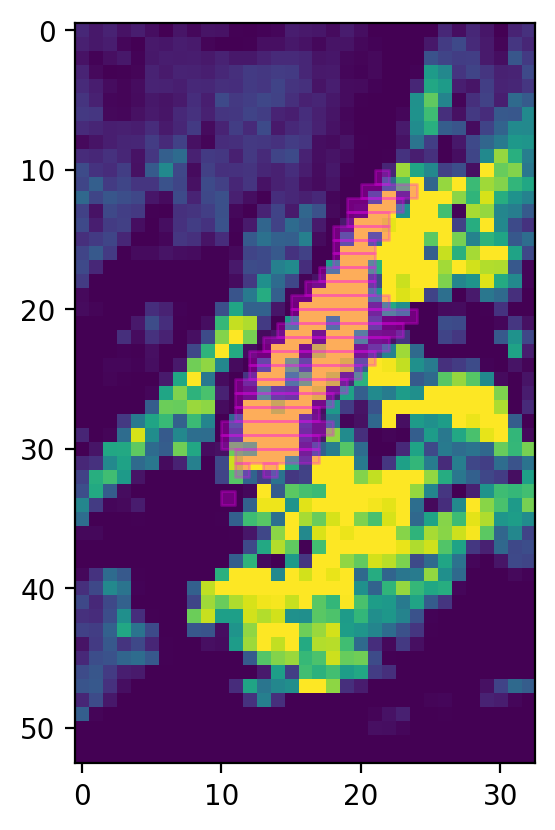

In [9]:
shape = counties[counties.longname == "New York County, New York, USA"].iloc[0].geometry
plot_lines(shape, 1200)
plot_lines(shape, 120)


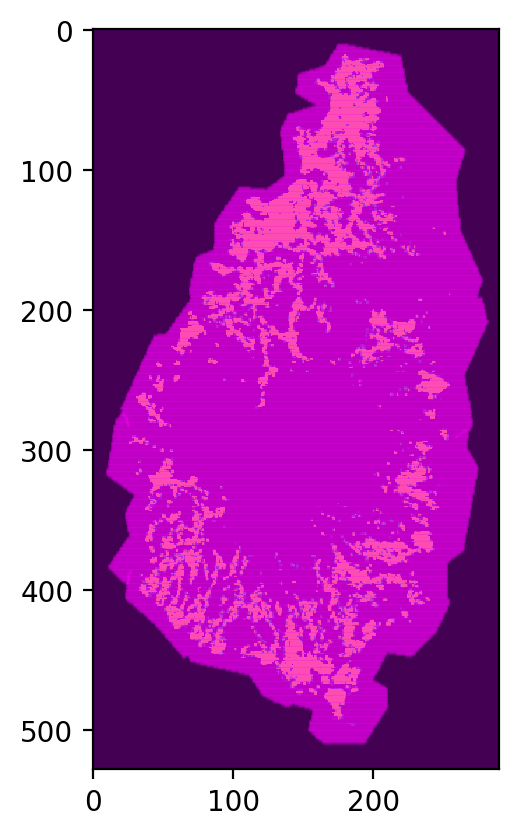

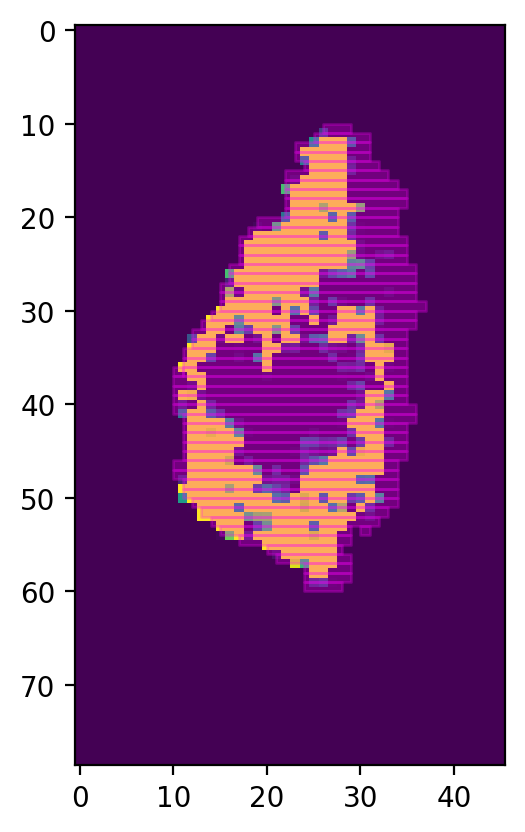

In [10]:
shape = countries[countries.longname == "Saint Lucia"].iloc[0].geometry
plot_lines(shape, 1200)
plot_lines(shape, 120)


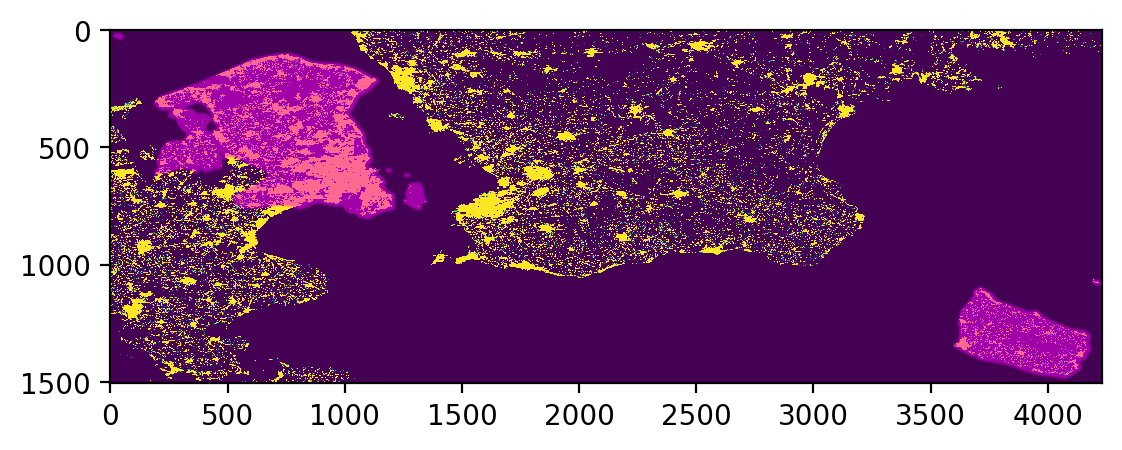

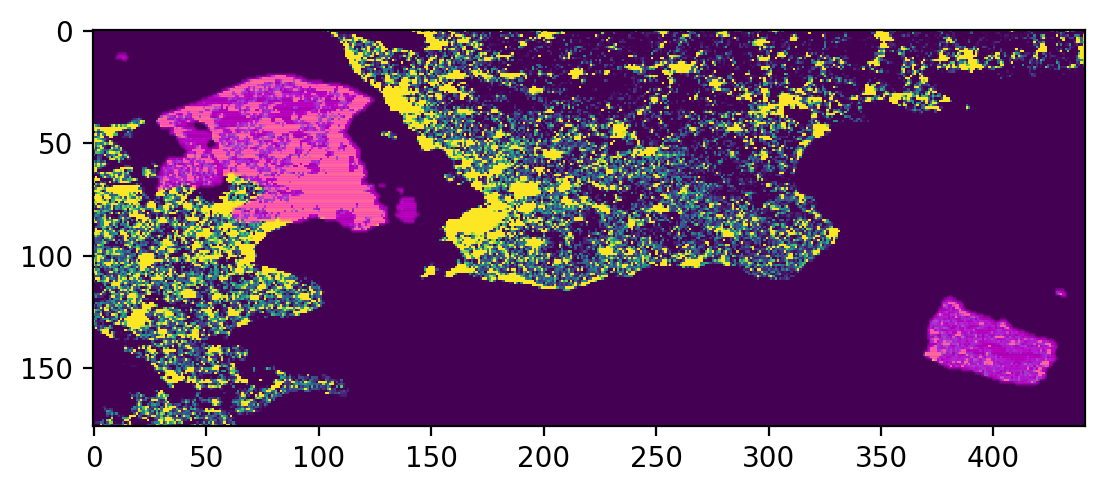

In [11]:
shape = subn[subn.longname == "Hovedstaden, Denmark"].iloc[0].geometry
plot_lines(shape, 1200, alpha=0.05)
plot_lines(shape, 120, alpha=0.25)

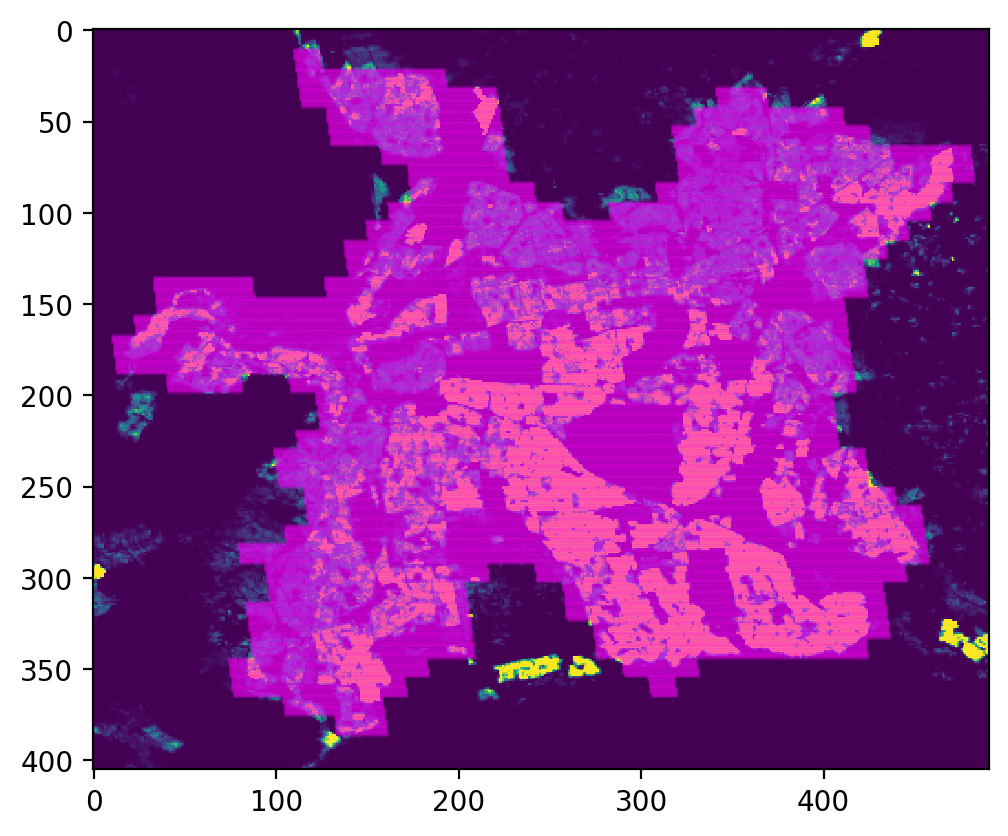

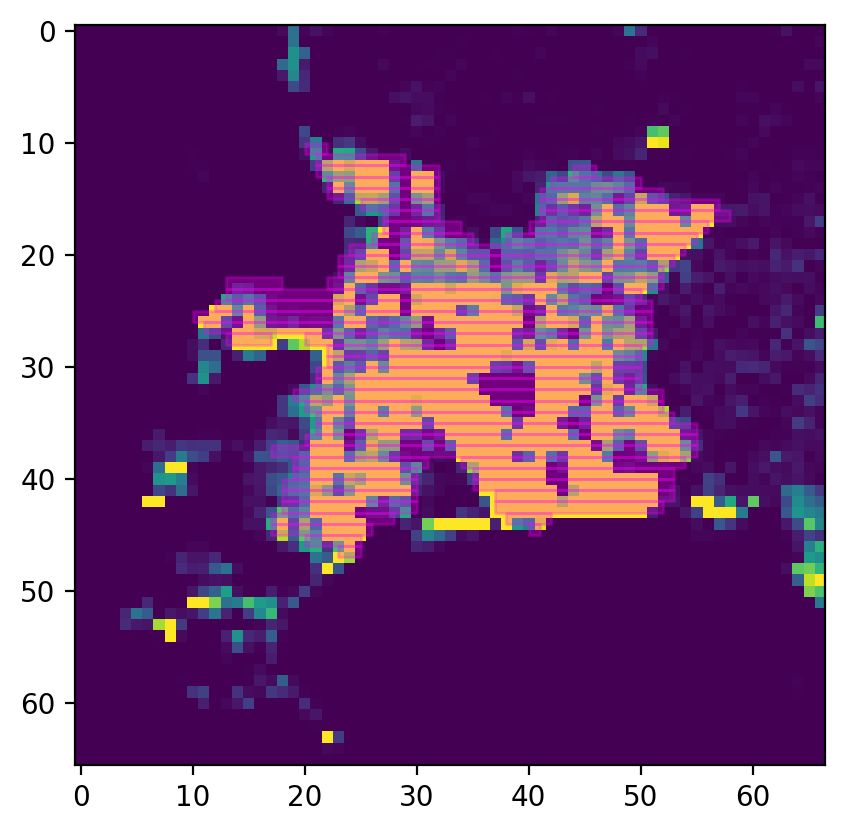

In [12]:
shape = urbc[urbc.longname == "Cape Town Urban Center, South Africa"].iloc[0].geometry
plot_lines(shape, 1200, alpha=0.25)
plot_lines(shape, 120, alpha=0.25)
